# Open University data analysis

This is a simple analysis of dataset related to Open Univeristy student information.
Firstly, we get an insight into the general student information: studentInfo.csv
This should include the overall distrubution by age and gender as well as final results.

Once this is established, attention will be given to other factors that might affect student withdrawal.

The dataset has been downoaded from the Open University
https://analyse.kmi.open.ac.uk/open_dataset




In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import csv as csv

%matplotlib inline

# read the csv file 
df = pd.read_csv('studentInfo.csv')

In [2]:
# get info about data: column names and number of rows
print(df.shape)
print(df.columns)

(32593, 12)
Index(['code_module', 'code_presentation', 'id_student', 'gender', 'region',
       'highest_education', 'imd_band', 'age_band', 'num_of_prev_attempts',
       'studied_credits', 'disability', 'final_result'],
      dtype='object')


In [3]:
# overview of data fields
df.head(8)

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass
5,AAA,2013J,38053,M,Wales,A Level or Equivalent,80-90%,35-55,0,60,N,Pass
6,AAA,2013J,45462,M,Scotland,HE Qualification,30-40%,0-35,0,60,N,Pass
7,AAA,2013J,45642,F,North Western Region,A Level or Equivalent,90-100%,0-35,0,120,N,Pass


In [4]:
# function to display percentages on the bars
total = float(len(df))
def show_perc(ax):
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.1f}'.format((height/total)*100),
            ha="center") 

# Student profile distribution


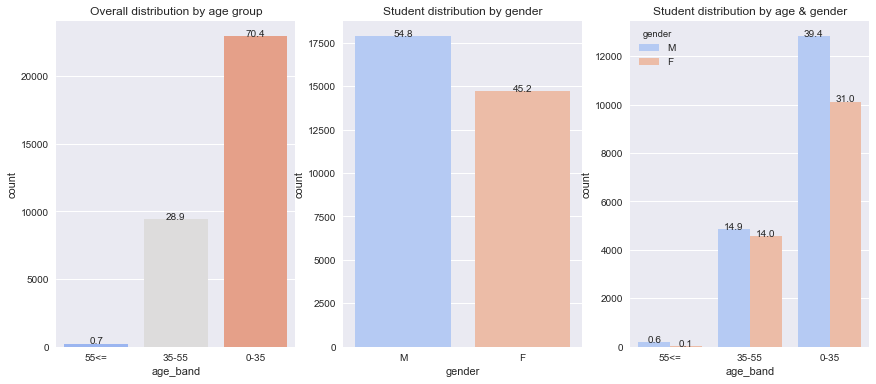

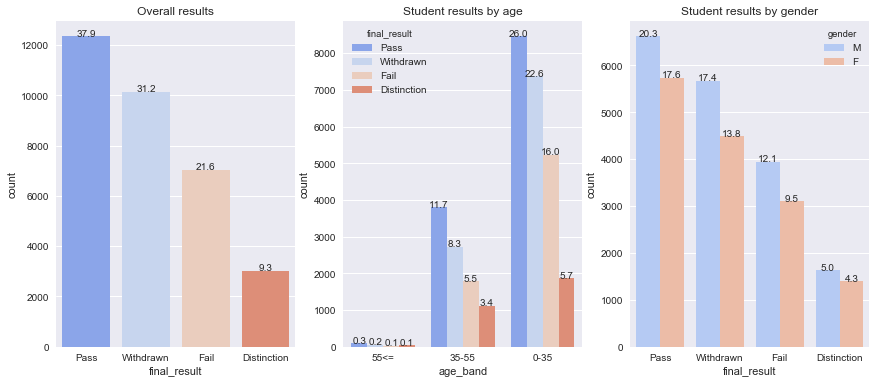

In [5]:
# plot all participants by age and gender
fig1 = plt.figure(figsize=(30,6))

ax1 = fig1.add_subplot(1,6,1)
g = sns.countplot('age_band', data=df, palette="coolwarm")
g.set_title("Overall distribution by age group")
show_perc(ax1)

ax2 = fig1.add_subplot(1,6,2)
g = sns.countplot('gender', data=df, palette="coolwarm")
g.set_title("Student distribution by gender")
show_perc(ax2)

# split participants by age and gender
ax3 = fig1.add_subplot(1,6,3)
g = sns.countplot('age_band', data=df, palette="coolwarm", hue='gender')
g.set_title("Student distribution by age & gender")
show_perc(ax3)

# plot all final results 
fig2 = plt.figure(figsize=(30,6))

ax4 = fig2.add_subplot(1,6,4)
g = sns.countplot('final_result', data=df, palette="coolwarm")
g.set_title("Overall results")
show_perc(ax4)

# view results by age 
ax5 = fig2.add_subplot(1,6,5)
g = sns.countplot('age_band', data=df, palette="coolwarm", hue='final_result')
g.set_title("Student results by age")
show_perc(ax5)

# view results by gender
ax6 = fig2.add_subplot(1,6,6)
g = sns.countplot('final_result', data=df, palette="coolwarm", hue='gender')
g.set_title("Student results by gender")
show_perc(ax6)

# Observations

    Not very surprisingly, most students are in the 0-35 age group, more male students than female.
    Age gap in the 35-55 group is much less though and something that can be looked into.

    The results are less enthusiatic: Only 39% passes and 10% with distinction.

    The percentage of students who withdraw is quite high as is those who Fail.
    Hence further analysis will be given to these groups.

    Find correlation between students who withdraw and:
    * region
    * imd_score
    * highest education
    * previous attempts
    * number of credits

# Students who withdraw: the lost 30%

In [23]:
# convert data in the original dataset from categorical to numerical (it is easier to analyse)
df_encoded = pd.get_dummies(df, columns=['age_band','gender','disability', 'highest_education','imd_band','region', 'final_result'], drop_first=True)
df_encoded.columns

Index(['code_module', 'code_presentation', 'id_student',
       'num_of_prev_attempts', 'studied_credits', 'age_band_35-55',
       'age_band_55<=', 'gender_M', 'disability_Y',
       'highest_education_HE Qualification',
       'highest_education_Lower Than A Level',
       'highest_education_No Formal quals',
       'highest_education_Post Graduate Qualification', 'imd_band_10-20',
       'imd_band_20-30%', 'imd_band_30-40%', 'imd_band_40-50%',
       'imd_band_50-60%', 'imd_band_60-70%', 'imd_band_70-80%',
       'imd_band_80-90%', 'imd_band_90-100%', 'region_East Midlands Region',
       'region_Ireland', 'region_London Region', 'region_North Region',
       'region_North Western Region', 'region_Scotland',
       'region_South East Region', 'region_South Region',
       'region_South West Region', 'region_Wales',
       'region_West Midlands Region', 'region_Yorkshire Region',
       'final_result_Fail', 'final_result_Pass', 'final_result_Withdrawn'],
      dtype='object')

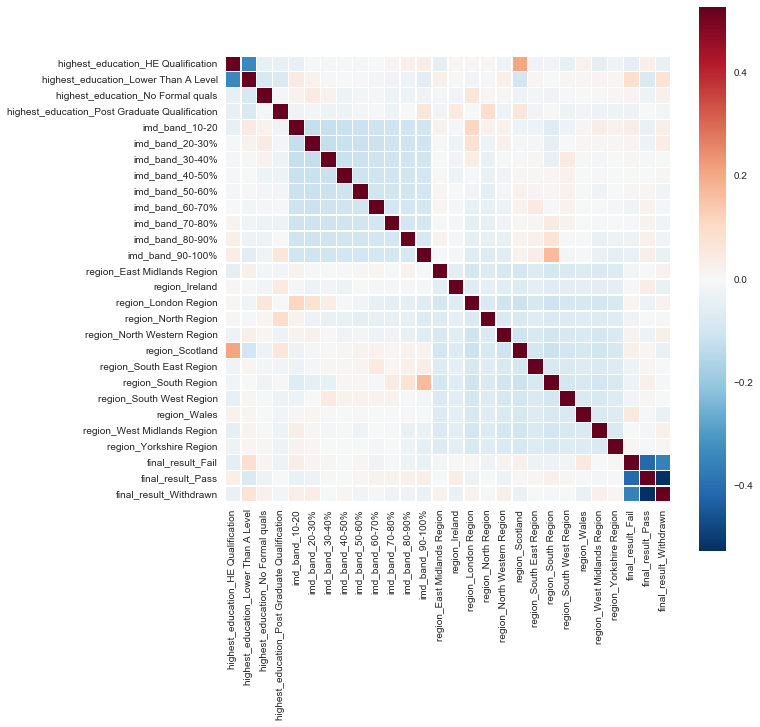

In [7]:
# visual representation of correlations using heatmap
plt.figure(figsize=(10, 10))
features = ['highest_education_HE Qualification',
       'highest_education_Lower Than A Level',
       'highest_education_No Formal quals',
       'highest_education_Post Graduate Qualification','imd_band_10-20',
       'imd_band_20-30%', 'imd_band_30-40%', 'imd_band_40-50%',
       'imd_band_50-60%', 'imd_band_60-70%', 'imd_band_70-80%',
       'imd_band_80-90%', 'imd_band_90-100%', 
       'region_East Midlands Region',
       'region_Ireland', 'region_London Region', 'region_North Region',
       'region_North Western Region', 'region_Scotland',
       'region_South East Region', 'region_South Region',
       'region_South West Region', 'region_Wales',
       'region_West Midlands Region', 'region_Yorkshire Region',
       'final_result_Fail', 'final_result_Pass', 'final_result_Withdrawn']
corr = df_encoded[features].corr()
sns.heatmap(corr, square = True, linewidths = 0.5, vmax = 0.1)

In [8]:
# Look at only the students who withdraw
withdraw = df_encoded[df_encoded['final_result_Withdrawn'] == 1]
# get info about data: column names and number of rows
print(withdraw.shape)

(10156, 36)


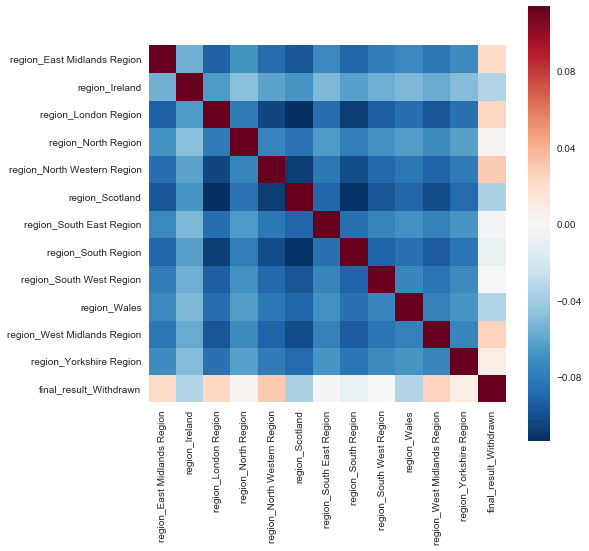

In [9]:
# visual representation of correlation between withdrawal and regions using heatmap
plt.figure(figsize=(8,8))
features = ['region_East Midlands Region',
       'region_Ireland', 'region_London Region', 'region_North Region',
       'region_North Western Region', 'region_Scotland',
       'region_South East Region', 'region_South Region',
       'region_South West Region', 'region_Wales',
       'region_West Midlands Region', 'region_Yorkshire Region', 
       'final_result_Withdrawn']
corr = df_encoded[features].corr()
sns.heatmap(corr, square = True, vmax = 0.1 )

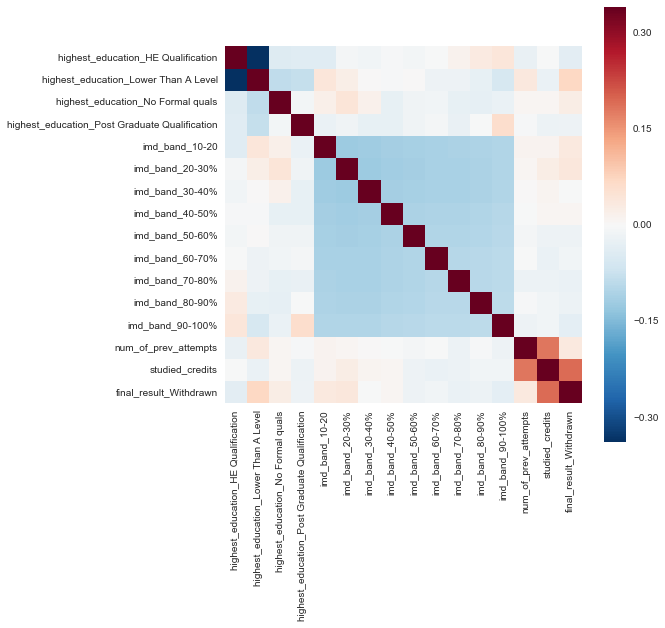

In [10]:
# visual representation of correlations using heatmap
plt.figure(figsize=(8,8))
features = ['highest_education_HE Qualification',
       'highest_education_Lower Than A Level',
       'highest_education_No Formal quals',
       'highest_education_Post Graduate Qualification','imd_band_10-20',
       'imd_band_20-30%', 'imd_band_30-40%', 'imd_band_40-50%',
       'imd_band_50-60%', 'imd_band_60-70%', 'imd_band_70-80%',
       'imd_band_80-90%', 'imd_band_90-100%', 
       'num_of_prev_attempts',
       'studied_credits',
       'final_result_Withdrawn']
corr = df_encoded[features].corr()
sns.heatmap(corr, square = True, vmax = 0.3 )

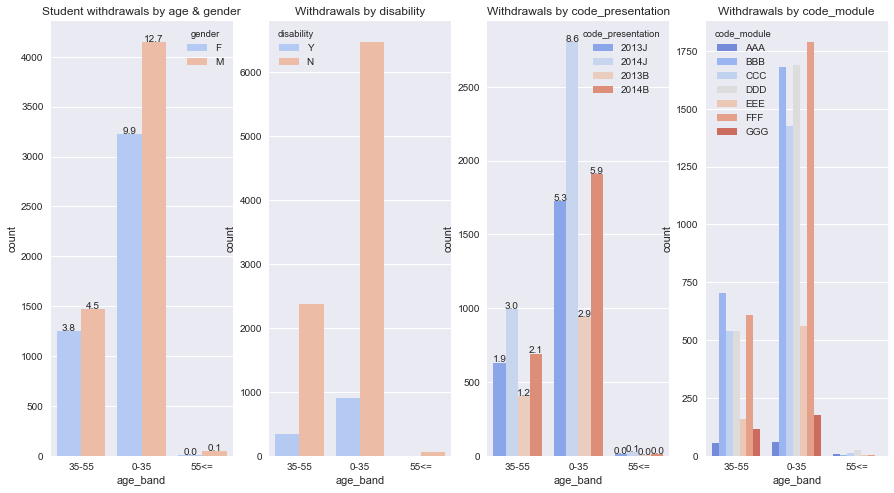

In [11]:
# plot other factors
fig = plt.figure(figsize=(15,8))

ax1 = fig.add_subplot(1,4,1)
g = sns.countplot('age_band', data=withdraw, palette="coolwarm", hue='gender')
g.set_title("Student withdrawals by age & gender")
show_perc(ax1)

ax2 = fig.add_subplot(1,4,2)
g = sns.countplot('age_band', data=withdraw, palette="coolwarm", hue='disability')
g.set_title("Withdrawals by disability")
#show_perc(ax2)

# split participants by age and gender
ax3 = fig.add_subplot(1,4,3)
g = sns.countplot('age_band', data=withdraw, palette="coolwarm", hue='code_presentation')
g.set_title("Withdrawals by code_presentation")
show_perc(ax3)

# split participants by age and gender
ax4 = fig.add_subplot(1,4,4)
g = sns.countplot('age_band', data=withdraw, palette="coolwarm", hue='code_module')
g.set_title("Withdrawals by code_module")
#show_perc(ax3)



In [12]:
df.code_module.value_counts()

BBB    7909
FFF    7762
DDD    6272
CCC    4434
EEE    2934
GGG    2534
AAA     748
Name: code_module, dtype: int64

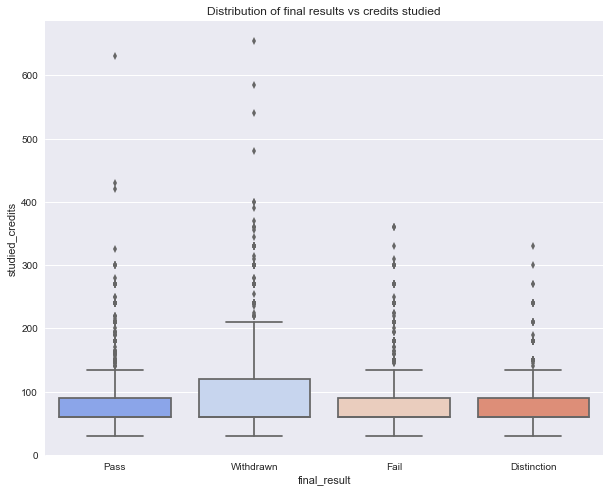

In [16]:
# look at studied_credits as it has the most positive correlation with withdrawal
g = sns.boxplot(df['final_result'], df.studied_credits, palette="coolwarm")
g.figure.set_size_inches(10,8)
g.set_title("Distribution of final results vs credits studied")

0    8685
1    1150
2     247
3      53
4      14
5       5
6       2
Name: num_of_prev_attempts, dtype: int64


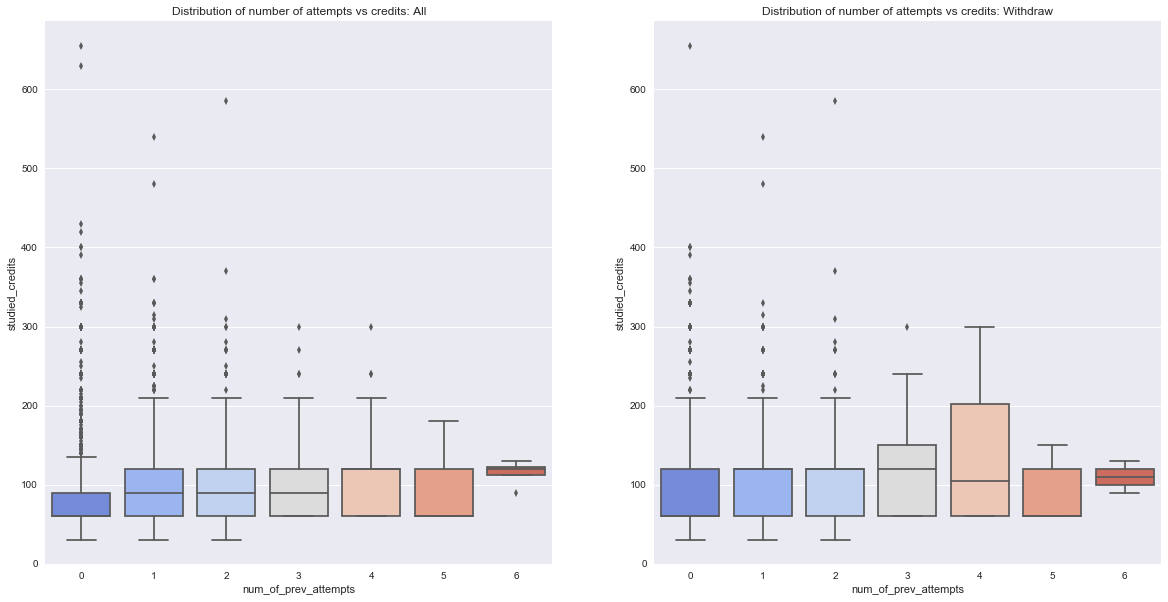

In [33]:
# plot number of previous attempts against credits
fig = plt.figure(figsize=(20,10))

ax1 = fig.add_subplot(1,2,1)
g = sns.boxplot(df.num_of_prev_attempts, df.studied_credits, palette="coolwarm")
g.set_title("Distribution of number of attempts vs credits: All")

ax2 = fig.add_subplot(1,2,2)
g = sns.boxplot(withdraw.num_of_prev_attempts, withdraw.studied_credits, palette="coolwarm")
g.set_title("Distribution of number of attempts vs credits: Withdraw")

print(withdraw.num_of_prev_attempts.value_counts())

# An insight into profile of students who withdraw

    * As expected, the number of students who withdraw is higher for 0-35 age group, not disabled students male students. This is not significant as more students enrol in this group.

    * For the same reasons, more students withdraw from BBB, DDD and FFF code modules

    * Increase from 2013 to 2014. More students who enrol in October withdraw compared to January but overall, more student enrol in October. So this is not very significant. 
    
    * More interesting information can be gleaned from the heatmaps
    Clearly, fewer students from Ireland, Scotland and Wales (negative correlation)
    More students from Midlands, London and the North-West
    
    * imd_bands also give some interesting information:
    higher_education is correlated to imd_band: those from 10-30% having A level Quals or less whereas 90-100% having a Post Graduate Qual. This is a presumed trend and it can be observed here. It can also be seen that the students who already have a degree and less likely to withdraw
    
    * While it is not directly relevant, number of previous attempts is more for students who have not attended univeristy before. Hence more the number of studied credits, higher the chance of withdrawal
    
** As a summary, the most positive correlation is with studied credit. This is in turn correlated the most with number of previous attempts. Students who have never been to univeristy or even achieved A Level have the most previous attempts. So this is a causal link. It can also be observed that that higher education is correlated to region and more than that, imd_band. 
There may be other factors affecting the studied credits and pointers like assessments, courses taken and/or VLE engagement. That would form the basis for the next data story.** 
    